In [ ]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

from numpy import ndarray

from typing import Type

from skimage import io
from skimage import transform

from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PneumoniaMNIST (Binary Class data)

In [ ]:
#Loading PneumoniaMNIST
pneu_file_path = "/content/drive/MyDrive/PRNN/pneumoniamnist.npz"

pneu_data = np.load(pneu_file_path)

# Extrating training data
pneu_train_data = pneu_data["train_images"]
pneu_train_labels = pneu_data["train_labels"]

# Extracting test data
pneu_test_data = pneu_data["test_images"]
pneu_test_labels = pneu_data["test_labels"]

# Extracting validation data
pneu_val_data = pneu_data["val_images"]
pneu_val_labels = pneu_data["val_labels"]

# Vectorizing data
vector_size = pneu_train_data.shape[1] * pneu_train_data.shape[2]

pneu_train_vdata = np.resize(pneu_train_data, (pneu_train_data.shape[0],vector_size))

pneu_test_vdata = np.resize(pneu_test_data, (pneu_test_data.shape[0],vector_size))

pneu_val_vdata = np.resize(pneu_val_data, (pneu_val_data.shape[0],vector_size))

print(pneu_train_vdata.shape)
print(pneu_test_vdata.shape)
print(pneu_val_vdata.shape)

(4708, 784)
(624, 784)
(524, 784)


#BloodMNIST (MULTI Class Data)

In [ ]:
# Loading BloodMNIST
blood_file_path = "/content/drive/MyDrive/PRNN/bloodmnist.npz"

blood_data = np.load(blood_file_path)

# Extrating training data
blood_train_data = blood_data["train_images"]
blood_train_labels = blood_data["train_labels"]

# Extracting test data
blood_test_data = blood_data["test_images"]
blood_test_labels = blood_data["test_labels"]

# Extracting validation data
blood_val_data = blood_data["val_images"]
blood_val_labels = blood_data["val_labels"]

# Vectorizing data
vector_size = blood_train_data.shape[1] * blood_train_data.shape[2]

blood_train_vdata = np.resize(blood_train_data, (blood_train_data.shape[0],vector_size))

blood_test_vdata = np.resize(blood_test_data, (blood_test_data.shape[0],vector_size))

blood_val_vdata = np.resize(blood_val_data, (blood_val_data.shape[0],vector_size))

print(blood_train_vdata.shape)
print(blood_test_vdata.shape)
print(blood_val_vdata.shape)

(11959, 784)
(3421, 784)
(1712, 784)


#Traffic signs Data for bounding box regression problem

In [ ]:
# Loading Traffic signs data for bounding box regression problem
traffic_images_path = "/content/drive/MyDrive/PRNN/Traffic sign/images"
traffic_annotations_path = "/content/drive/MyDrive/PRNN/Traffic sign/annotations"

traffic_labels = list()

for annot_path in os.listdir(traffic_annotations_path):
  traffic_labels.append(annot_path)

# Ratio for test data
train_prob = 0.7

traffic_train_data = list()
traffic_test_data = list()
traffic_train_gray_data = list()
traffic_test_gray_data = list()

traffic_train_labels = list()
traffic_test_labels = list()

for i in range(len(traffic_labels)):
  tree = ET.parse(os.path.join(traffic_annotations_path, traffic_labels[i]))
  root = tree.getroot()
  
  img_file = root[1].text

  obj = root.find("object")
  bndbox = obj.find("bndbox")

  if bndbox:
    box = np.array([[int(bndbox[0].text), int(bndbox[1].text), int(bndbox[2].text), int(bndbox[3].text)]])

    img = io.imread(os.path.join(traffic_images_path, img_file))[:,:,:3]
    img_gray = io.imread(os.path.join(traffic_images_path, img_file), as_gray = True)

    if img.shape[0] == 400 and img.shape[1] == 300:
      img = transform.resize(img, (200,150), anti_aliasing = True)
      img_gray = transform.resize(img_gray, (200,150), anti_aliasing = True)

      label = box//2

      if random.random() <= train_prob:
        traffic_train_data.append(img)
        traffic_train_gray_data.append(img_gray)
        traffic_train_labels.append(label[0])
      else:
        traffic_test_data.append(img)
        traffic_test_gray_data.append(img_gray)
        traffic_test_labels.append(label[0])

In [ ]:
traffic_train_labels = np.array(traffic_train_labels)
traffic_test_labels = np.array(traffic_test_labels)
print(traffic_train_labels.shape)
print(traffic_test_labels.shape)

traffic_train_data = np.array(traffic_train_data)
traffic_test_data = np.array(traffic_test_data)
traffic_train_gray_data = np.array(traffic_train_gray_data)
traffic_test_gray_data = np.array(traffic_test_gray_data)

print(traffic_train_data.shape)
print(traffic_test_data.shape)
print(traffic_test_gray_data.shape)
print(traffic_train_gray_data.shape)

traffic_train_vdata = np.resize(traffic_train_data, (traffic_train_data.shape[0],400*300*3))
traffic_test_vdata = np.resize(traffic_test_data, (traffic_test_data.shape[0],400*300*3))
traffic_train_gray_vdata = np.resize(traffic_train_gray_data, (traffic_train_gray_data.shape[0],400*300))
traffic_test_gray_vdata = np.resize(traffic_test_gray_data, (traffic_test_gray_data.shape[0],400*300))

print()
print(traffic_train_vdata.shape)
print(traffic_test_vdata.shape)
print(traffic_test_gray_vdata.shape)
print(traffic_train_gray_vdata.shape)

(502, 4)
(229, 4)
(502, 200, 150, 3)
(229, 200, 150, 3)
(229, 200, 150)
(502, 200, 150)

(502, 360000)
(229, 360000)
(229, 120000)
(502, 120000)


In [ ]:
def calc_classification_metrics(y1,y2):
  # print(y1.shape,y2.shape)
  accuracy = (y1[np.where(y1==y2)].size)/y1.size
  print("Accuracy:",accuracy)

  try:
    f1 = f1_score(y1,y2,average='macro')
    print("F1 Score:",f1)
  except:
    pass

  try:
    auc = roc_auc_score(y1,y2,multi_class='ovo')
    print("AUC:",auc)
  except:
    pass

In [ ]:
#Density codes
GUASSIAN_DENSITY = 0
EXPONENTIAL_DENSITY = 1
GUASSIAN_MIXTURE_DENSITY = 2

class ProbabilityDensity:
    def __init__(self) -> None:
        pass
    
    def set_params(self):
        pass
    
    def get_params(self):
        pass
    
    def get_value(self,x : ndarray):
        pass

class GuassianDensity(ProbabilityDensity):
    def __init__(self,dim : int = 1,params : list = None,params_dtype : Type = np.float32) -> None:
        self.dim= dim
        self.mean = np.ones((dim), dtype = params_dtype)
        self.covariance = np.ones((dim,dim), dtype = params_dtype)

        if(params != None and self.dim == params[0].shape[0]):
            self.set_params(params[0],params[1])

        self.const = 1/((2*np.pi)**0.5)**dim

        if(dim == 1):
            self.det_covariance = self.covariance[0,0]
        else:
            self.det_covariance = np.linalg.det(self.covariance)
        
        if(dim == 1 or self.det_covariance == 0):
            self.inv_covariance = self.covariance
        else:
            self.inv_covariance = np.linalg.inv(self.covariance)
        
    def set_params(self,mean : ndarray, covariance : ndarray):
        if(self.mean.shape == mean.shape and self.covariance.shape == covariance.shape):
            del self.mean
            del self.covariance
                
            self.mean = mean.copy()
            self.covariance = covariance.copy()
                
            if(self.dim == 1):
                self.det_covariance = self.covariance[0,0]
            else:
                self.det_covariance = np.linalg.det(self.covariance)
        
            if(self.dim == 1 or self.det_covariance == 0):
                self.inv_covariance = self.covariance
            else:
                self.inv_covariance = np.linalg.inv(self.covariance)
        else:
            if(self.mean.shape != mean.shape):
                print("Mismatching dimension for mean: Required",self.mean.shape,"Given",self.mean.shape)
            elif(self.covariance.shape != covariance.shape):
                print("Mismatching dimensions for covariance: Required",self.covariance.shape,"Given",covariance.shape)
            
    def get_params(self):
        return self.mean.copy(), self.covariance.copy()
    
    def get_value(self,x : ndarray):
        if(self.mean.shape == x.shape):
            val = self.const
            val = val/self.det_covariance
            
            diff_vec = x - self.mean
            
            diff_vec = np.expand_dims(diff_vec,axis=0)
            
            exponent = np.exp(-0.5*(np.matmul(np.matmul(diff_vec,self.inv_covariance),np.transpose(diff_vec))))
                
            return val*exponent
        else:
            print("Mismatching dimension for input vector: Required",self.mean.shape,"Given",x.shape)
            
class ExponentialDensity(ProbabilityDensity):
    def __init__(self,dim : int = 1,params : ndarray = None,params_dtype : Type = np.float32) -> None:
        self.dim = dim
        self.lamb = np.ones((dim),dtype=params_dtype)

        if(isinstance(params,ndarray) and self.dim == params.shape[0]):
            for i in range(self.dim):
                self.lamb[i] = params[i]
        
    def set_params(self,lamb : ndarray):
        if(self.lamb.shape == lamb.shape):
            del self.lamb
            
            self.lamb = lamb.copy()
        else:
            print("Mismatching dimension for lambda: Required",self.lamb.shape,"Given",lamb.shape)
            
    def get_params(self):
        return self.lamb.copy()
    
    def get_value(self,x : ndarray):
        if(x.shape == self.lamb.shape):
            lamb_prod = 1
            
            for i in range(self.dim):
                lamb_prod = lamb_prod * self.lamb[i]

            lamb = self.lamb.copy()
            lamb = np.expand_dims(lamb,axis=0)

            exponent = np.exp(-1*(np.matmul(self.lamb,np.transpose(x))))

            del lamb

            return lamb_prod*exponent
        else:
            print("Mismatching dimension for input vector: Required",self.lamb.shape,"Given",x.shape)
            
class GuassianMixtureDensity(ProbabilityDensity):
    def __init__(self, dim : int = 1, num_mixtures : int = 2, params : list = None, params_dtype : Type = np.float32) -> None:
        self.dim = dim
        self.num_mixtures = num_mixtures
        self.latent_params = np.ones((self.num_mixtures))/self.num_mixtures
        self.densities = list()
        
        for i in range(self.num_mixtures):
            self.densities.append(GuassianDensity(self.dim))
            
        if(len(params) == 2):
            if(np.sum(params[0]) == 1 and params[0].shape[0] == self.num_mixtures and len(params[1]) == self.num_mixtures):
                for i in range(self.num_mixtures):
                    self.latent_params[i] = params[0][i]
                
                i = 0
                for param in params[1]:
                    if(len(param) == 2):
                        self.densities[i].set_params(param[0],param[1])
                    else:
                        print("Warning: Invalid params for",i,"th density using default params")
                        
                    i += 1
        else:
            print("Error: Invalid number/format of params")
            
    def set_params(self,latent_params : ndarray, params : list):
        if(np.sum(latent_params) == 1 and latent_params.shape[0] == self.num_mixtures):
            del self.latent_params
            
            self.latent_params = latent_params.copy()
        else:
            print("Warning: Invalid latent params, Ignoring given params")
            
        if(len(params) == self.num_mixtures):
            i = 0
            for param in params:
                if(len(params) == 2):
                    self.densities[i].set_params(param[0],param[1])
                else:
                    print("Warning: Invalid params for",i,"th density, Ignoring given params")
                i += 1
        else:
            print("Error: Mismatch between number of params and mixtures")
            
    def add_density(self,latent_params : ndarray, params : list = None):
        if(latent_params.shape[0] == self.num_mixtures + 1 and np.sum(latent_params) == 1):
            del self.latent_params
            
            self.latent_params = latent_params.copy()
            self.densities.append(GuassianDensity(self.dim))
            
            if(params != None and len(params) == 2):
                self.densities[self.num_mixtures - 1].set_params(params[0],params[1])
            
    def get_params(self):
        params = list()
        
        for mixture in self.densities:
            params.append(mixture.get_params())
            
        return self.latent_params.copy(), params
    
    def get_value(self,x : ndarray):
        value = 0
        
        for i in range(self.num_mixtures):
            value += self.latent_params[i] * self.densities[i].get_value(x)
            
        return value

In [ ]:
#Estimate codes
ML_ESTIMATE = 0
BAYES_ESTIMATE = 1

def ML_Estimate(data_points : ndarray, density = GUASSIAN_DENSITY, stretch_dimensions = True):
    size, dim = data_points.shape[0], data_points.shape[1:]

    if(stretch_dimensions == True):
        new_dim = 1
        
        for i in dim:
            new_dim = new_dim * i

        new_data = np.zeros((size,new_dim),dtype=data_points.dtype)
        
        for i in range(size):
            new_data[i] = data_points[i].ravel()
            
        del data_points
        
        data_points = new_data
        
        size, dim = data_points.shape

    if(density == GUASSIAN_DENSITY):
        mean = np.zeros(dim)
        
        for i in range(size):
            mean += data_points[i]
        
        mean = mean/size
        
        covariance = np.zeros((dim,dim))
        
        for i in range(size):
            diff = data_points[i] - mean
            
            diff = np.expand_dims(diff,axis=0)

            covariance += np.matmul(np.transpose(diff), diff)
            covariance /= size
        
        return GuassianDensity(dim,[mean, covariance])
            
    elif(density == EXPONENTIAL_DENSITY):
        statistic = np.zeros(dim)
        
        for i in range(size):
            statistic += data_points[i]
            
        lamb = size/statistic

        return ExponentialDensity(dim,lamb)
        
    elif(density == GUASSIAN_MIXTURE_DENSITY):
        pass
    else:
        print("Invalid density model for ML Estimate")
        
def MAPEstimate(data_points : ndarray, density : GUASSIAN_DENSITY, stretch_dimensions = True):
    pass

In [ ]:
MEAN_SQUARE_LOSS = 0

#Bayes Classifier

In [ ]:
class BayesClassifier:
    __IMPLEMENTED_DENSITIES = [GUASSIAN_DENSITY,EXPONENTIAL_DENSITY,GUASSIAN_MIXTURE_DENSITY]
    __IMPLEMENTED_ESTIMATES = [ML_ESTIMATE,BAYES_ESTIMATE]
    
    def __init__(self,num_classes : int, class_densities : list = None, class_priors : ndarray = None) -> None:
        self.num_classes = num_classes
        
        self.__class_densities_codes = list()
        
        for i in range(self.num_classes):
            self.__class_densities_codes.append(GUASSIAN_DENSITY)

        if class_densities != None:
            for i in range(len(class_densities)):
                if class_densities[i] in BayesClassifier.__IMPLEMENTED_DENSITIES:
                    self.__class_densities_codes.append(class_densities[i])
        
        self.class_priors = list()
        
        if(class_priors != None):
            if(self.num_classes == class_priors.shape[0] and np.sum(class_priors) == 1):
                for prior in range(self.num_classes):
                    self.class_priors.append(prior)
            else:
                print("Invalid class priors: Switching to default")
                
        self.train_count = 0
                
    def train(self, data_points : ndarray, labels : ndarray, estimation_method = ML_ESTIMATE):
        if(len(labels.shape) != 1):
            print("Error: Labels should be 1-d array")
            return
        
        classes = np.unique(labels)

        num_classes = classes.shape[0]

        if(self.num_classes != num_classes):
            print("Number of classes in label set didn't match with classifier classes")
            return
        
        data_size, dim = data_points.shape[0], data_points[1:]
        label_size = labels.shape[0]
        
        if(data_size == label_size):
            if estimation_method not in self.IMPLEMENTED_ESTIMATES:
                print("Warning: Given estimated method is not implemented in this version yet, defaulting to ML Estimation")
                return
                
            class_wise_data = dict()
            
            for i in range(data_size):
                if labels[i] in class_wise_data:
                    class_wise_data[labels[i]].append(data_points[i])
                else:
                    class_wise_data[labels[i]] = list()
                
            if estimation_method == ML_ESTIMATE:
                self.class_densities = list()
                
                for i in range(self.num_classes):
                    self.class_densities.append(ML_Estimate(np.array(class_wise_data[i]),self.__class_densities_codes[i]))
                    
            self.train_count += 1
        else:
            print("Error: Mismatch between number of data points and number of labels provided")
            
    def classify(self, data_points : ndarray, true_labes):
        data_size, dim = data_points[0], data_points[1:]
        
        labels = np.zeros((data_size))
        probs = np.zeros((self.num_classes))
        
        for i in range(data_size):
            for j in range(self.num_classes):
                probs[j] = self.class_densities[j].get_value(data_points[i])
                
            labels[i] = np.argmax(probs)
        

        calc_classification_metrics(labels,true_labes)
        return labels

In [ ]:
classifer = BayesClassifier(2)
classifier.train(pneu_train_vdata, pneu_train_labels)
classifier.classify(pneu_test_vdata, pneu_test_labels)

In [ ]:
classifier = BayesClassifier(2,[EXPONENTIAL_DENSITY, GUASSIAN_DENSITY])
classifier.train(pneu_train_vdata, pneu_train_labels)
classifier.classify(pneu_test_vdata, pneu_test_labels)

In [ ]:
classifier = BayesClassifier(8)
classifier.train(blood_train_vdata, blood_train_labels)
classifier.classify(blood_test_vdata, blood_test_labels)

In [ ]:
classifier = BayesClassifier(8,[EXPONENTIAL, GUASSIAN_DENSITY, GUASSIAN_DENSITY, GUASSIAN_DESITY, EXPONENTIAL_DENSITY])
classifier.train(blood_train_vdata, blood_train_labels)
classifier.classify(blood_test_vdata, blood_test_labels)

#K NEAREST NEIGHBOURS

In [ ]:
from collections import Counter
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
       
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        k_idx = np.argsort(distances)[: self.k]
        
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)
    return X_train, X_test, y_train, y_test

def calculate_covariance_matrix(X, Y=None):
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))
    return np.array(covariance_matrix, dtype=float)


class Plot():
    def __init__(self): 
        self.cmap = plt.get_cmap('viridis')

    def _transform(self, X, dim):
        covariance = calculate_covariance_matrix(X)
        eigenvalues, eigenvectors = np.linalg.eig(covariance) 
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:dim]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :dim]   
        X_transformed = X.dot(eigenvectors)
        return X_transformed

    # Plot the dataset X and the corresponding labels y in 2D using PCA.
    def plot_in_2d(self, X, y=None, title=None, accuracy=None, legend_labels=None):
        X_transformed = self._transform(X, dim=2)
        x1 = X_transformed[:, 0]
        x2 = X_transformed[:, 1]
        class_distr = []
        y = np.array(y).astype(int)
        colors = [self.cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]   
        for i, l in enumerate(np.unique(y)):
            _x1 = x1[y == l]
            _x2 = x2[y == l]
            _y = y[y == l]
            class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))
        if not legend_labels is None: 
            plt.legend(class_distr, legend_labels, loc=1)
        if title:
            if accuracy:
                perc = 100 * accuracy
                plt.suptitle(title)
                plt.title("Accuracy: %.1f%%" % perc, fontsize=10)
            else:
                plt.title(title)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()

    # Plot the dataset X and the corresponding labels y in 3D using PCA.
    # def plot_3d(self,X,y=None):
    #     X_transformed = self._transform(X, dim=3)
    #     x1 = X_transformed[:, 0]
    #     x2 = X_transformed[:, 1]
    #     x3 = X_transformed[:, 2]  
    #     my_cmap = plt.get_cmap('hsv')
    #     fig = plt.figure(figsize = (16, 9))
    #     ax = plt.axes(projection ="3d")
    #     sctt = ax.scatter3D(x1, x2, x3,
    #                 alpha = 0.8,
    #                 c = (x1 + x2 + x3),
    #                 cmap = my_cmap,
    #                 marker ='^') 
    #     plt.title("Blood MNIST Dataset")
    #     ax.set_xlabel('Principal Component 1', fontweight ='bold')
    #     ax.set_ylabel('Principal Component 2', fontweight ='bold')
    #     ax.set_zlabel('Principal Component 3', fontweight ='bold')
    #     fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5,) 
    #     plt.show()
def accuracy(y_true, y_pred):
    accu = np.sum(y_true == y_pred) / len(y_true)
    return accu

KNN ON PNEUMONIA DATA SET


Accuracy: 0.8381410256410257
F1 Score: 0.808068411259353
AUC: 0.8827253827253827
KNN TEST  accuracy 0.8381410256410257


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


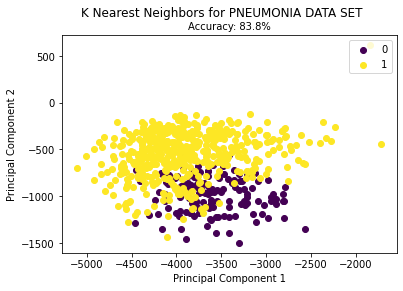

In [ ]:
X_train=pneu_train_vdata
y_train=np.ravel(pneu_train_labels)
X_test=pneu_test_vdata
y_test=np.ravel(pneu_test_labels)
k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
calc_classification_metrics(predictions,y_test)
print("KNN TEST  accuracy", accuracy(y_test, predictions))
Plot().plot_in_2d(X_test, predictions, title="K Nearest Neighbors for PNEUMONIA DATA SET ", accuracy=accuracy(y_test,predictions), legend_labels=np.unique(y_test))

KNN ON BLOOD MNIST DATASET

In [ ]:
X_train=blood_train_vdata
y_train=np.ravel(blood_train_labels)
X_test=blood_test_vdata
y_test=np.ravel(blood_test_labels)
k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
calc_classification_metrics(predictions,y_test)
print("KNN classification TEST accuracy", accuracy(y_test, predictions))

Accuracy: 0.1376790412160187
F1 Score: 0.12096017702736828
KNN classification TEST accuracy 0.1376790412160187


#Naive Bayes

In [ ]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy




NAIVE BAYES ON PNEUMONIA DATASET

In [ ]:
train_X=pneu_train_vdata
train_y=np.ravel(pneu_train_labels)
test_X=pneu_test_vdata
test_y=np.ravel(pneu_test_labels)
nb = NaiveBayes()
nb.fit(train_X, train_y)
predictions = nb.predict(test_X)
#print("Naive Bayes classification accuracy", accuracy(y_test, predictions))
calc_classification_metrics(test_y, predictions)

Accuracy: 0.8333333333333334
F1 Score: 0.8185701665119712
AUC: 0.8128205128205128


NAIVE BAYES ON BLOOD MNIST DATASET

In [ ]:
train_X=blood_train_vdata
train_y=np.ravel(blood_train_labels)
test_X=blood_test_vdata
test_y=np.ravel(blood_test_labels)
nb = NaiveBayes()
nb.fit(train_X, train_y)
predictions = nb.predict(test_X)

# print(clf.w, clf.b)
calc_classification_metrics(test_y, predictions)

Accuracy: 0.11429406606255481
F1 Score: 0.07347755105803817


#Linear Models

In [ ]:
class LinearClassifier:
    __IMPLEMENTED_LOSS = [MEAN_SQUARE_LOSS]
    
    def __init__(self) -> None:
        self.kernel = None
        self.regularization = [0,0]

        self.train_count = 0

    def train(self, x_data : ndarray, y_data : ndarray, lr = 0.01, epochs = 1, loss_fn = MEAN_SQUARE_LOSS, kernel = None, regularization = [0,0], shuffle = True):
        self.kernel = kernel
        self.regularization = regularization

        if self.kernel != None:
            x_data = self.kernel(x_data)

        self.w = np.random.rand(x_data[0].shape[0])
        self.b = 0

        indices = list(range(x_data.shape[0]))

        iters = 0
        losses = list()

        for epoch in range(epochs):
            if shuffle:
                random.shuffle(indices)

            w_grad = 0
            b_grad = 0

            loss = list()

            l1 = np.sign(self.w)
            l2 = 2*self.w
            
            w_grad = (eval(x_data) - y_data)*x_data
            b_grad = (eval(x_data) - y_data)
            loss.append((eval(x_data) - y_data)**2)

            self.w = self.w - lr*(w_grad + regularization[0]*l1 + regularization[1]*l2)
            self.b = self.b - lr*b_grad

            losses.append(np.mean(loss))
            iters += 1

            print("Iter: {0}    Loss:{1}".format(iters,losses[-1]))

        plt.plot(list(range(iters)),losses)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.show()

    def eval(self,x):
      y = self.w * x + self.b
      print(y.shape)
      if y >= 0:
        return 1
      
      return 0

class LinearRegression:
    __IMPLEMENTED_LOSS = [MEAN_SQUARE_LOSS]

    def __init__(self) -> None:
        self.kernel = None
        self.regularization = [0,0]

        self.train_count = 0

    def train(self, x_data : ndarray, y_data : ndarray, lr = 0.01, epochs = 1, batch_size = None, loss_fn = MEAN_SQUARE_LOSS, kernel = None, regularization = [0,0], shuffle = True):
        self.kernel = kernel
        self.regularization = regularization

        if self.kernel != None:
            x_data = self.kernel(x_data)

        

    def __activation(self,x):
        return x

class LogisticRegression(LinearRegression):
    def __activation(self,x):
        return x

In [ ]:
#activation functions
class ActivationFunction:
    def f(self, x):
        raise NotImplementedError

    def df(self, x, cached_y=None):
        raise NotImplementedError


class Identity(ActivationFunction):
    def f(self, x):
        return x

    def df(self, x, cached_y=None):
        return np.full(x.shape, 1)


class Sigmoid(ActivationFunction):
    def f(self, x):
        return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))

    def df(self, x, cached_y=None):
        y = cached_y if cached_y is not None else self.f(x)
        return y * (1 - y)


class ReLU(ActivationFunction):
    def f(self, x):
        return np.maximum(0, x)

    def df(self, x, cached_y=None):
        return np.where(x <= 0, 0, 1)


class SoftMax(ActivationFunction):
    def f(self, x):
        y = np.exp(x - np.max(x, axis=1, keepdims=True))
        return y / np.sum(y, axis=1, keepdims=True)

    def df(self, x, cached_y=None):
        raise NotImplementedError


identity = Identity()
sigmoid = Sigmoid()
relu = ReLU()
softmax = SoftMax()

In [ ]:
#cost functions
epsilon = 1e-20

class CostFunction:
    def f(self, a_last, y):
        raise NotImplementedError

    def grad(self, a_last, y):
        raise NotImplementedError


class SigmoidCrossEntropy(CostFunction):
    def f(self, a_last, y):
        batch_size = y.shape[0]
        a_last = np.clip(a_last, epsilon, 1.0 - epsilon)
        cost = -1 / batch_size * (y * np.log(a_last) + (1 - y) * np.log(1 - a_last)).sum()
        return cost

    def grad(self, a_last, y):
        a_last = np.clip(a_last, epsilon, 1.0 - epsilon)
        return - (np.divide(y, a_last) - np.divide(1 - y, 1 - a_last))


class SoftmaxCrossEntropy(CostFunction):
    def f(self, a_last, y):
        batch_size = y.shape[0]
        cost = -1 / batch_size * (y * np.log(np.clip(a_last, epsilon, 1.0))).sum()
        return cost

    def grad(self, a_last, y):
        return - np.divide(y, np.clip(a_last, epsilon, 1.0))

class Squared_error(CostFunction):
    def f(self, a_last, y):
        batch_size = y.shape[0]
        cost = 1 /batch_size * ((y-a_last)**2).sum()
        return cost

    def grad(self, a_last, y):
        return (y-a_last).sum()

squared_error = Squared_error()
softmax_cross_entropy = SoftmaxCrossEntropy()
sigmoid_cross_entropy = SigmoidCrossEntropy()

In [ ]:
#layers

#layer class
class Layer:

    def init(self, in_dim):
        raise NotImplementedError

    def forward(self, a_prev, training):
        raise NotImplementedError

    def backward(self, da):
        #Propagates back the gradients
        raise NotImplementedError

    def update_params(self, dw, db):
        raise NotImplementedError
    def update_params_L2(self, dw, db):
        raise NotImplementedError

    def get_params(self):
        raise NotImplementedError

    def get_output_dim(self):
        raise NotImplementedError


#convolutional layer

class Conv(Layer):

    def __init__(self, kernel_size, stride, n_c, padding='valid', activation=identity):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.pad = None
        self.n_h, self.n_w, self.n_c = None, None, n_c
        self.n_h_prev, self.n_w_prev, self.n_c_prev = None, None, None
        self.w = None
        self.b = None
        self.activation = activation
        self.cache = {}

    def init(self, in_dim):
        self.pad = 0 if self.padding == 'valid' else int((self.kernel_size - 1) / 2)

        self.n_h_prev, self.n_w_prev, self.n_c_prev = in_dim
        self.n_h = int((self.n_h_prev - self.kernel_size + 2 * self.pad) / self.stride + 1)
        self.n_w = int((self.n_w_prev - self.kernel_size + 2 * self.pad) / self.stride + 1)

        self.w = np.random.randn(self.kernel_size, self.kernel_size, self.n_c_prev, self.n_c)
        self.b = np.zeros((1, 1, 1, self.n_c))

    def forward(self, a_prev, training):
        batch_size = a_prev.shape[0]
        a_prev_padded = Conv.zero_pad(a_prev, self.pad)
        out = np.zeros((batch_size, self.n_h, self.n_w, self.n_c))

        # Convolve
        for i in range(self.n_h):
            v_start = i * self.stride
            v_end = v_start + self.kernel_size

            for j in range(self.n_w):
                h_start = j * self.stride
                h_end = h_start + self.kernel_size

                out[:, i, j, :] = np.sum(a_prev_padded[:, v_start:v_end, h_start:h_end, :, np.newaxis] *
                                         self.w[np.newaxis, :, :, :], axis=(1, 2, 3))

        z = out + self.b
        a = self.activation.f(z)

        if training:
            # Cache for backward pass
            self.cache.update({'a_prev': a_prev, 'z': z, 'a': a})

        return a

    def backward(self, da):
        batch_size = da.shape[0]
        a_prev, z, a = (self.cache[key] for key in ('a_prev', 'z', 'a'))
        a_prev_pad = Conv.zero_pad(a_prev, self.pad) if self.pad != 0 else a_prev

        da_prev = np.zeros((batch_size, self.n_h_prev, self.n_w_prev, self.n_c_prev))
        da_prev_pad = Conv.zero_pad(da_prev, self.pad) if self.pad != 0 else da_prev

        dz = da * self.activation.df(z, cached_y=a)
        db = 1 / batch_size * dz.sum(axis=(0, 1, 2))
        dw = np.zeros((self.kernel_size, self.kernel_size, self.n_c_prev, self.n_c))

        # 'Convolve' back
        for i in range(self.n_h):
            v_start = self.stride * i
            v_end = v_start + self.kernel_size

            for j in range(self.n_w):
                h_start = self.stride * j
                h_end = h_start + self.kernel_size

                da_prev_pad[:, v_start:v_end, h_start:h_end, :] += \
                    np.sum(self.w[np.newaxis, :, :, :, :] * dz[:, i:i+1, j:j+1, np.newaxis, :], axis=4)

                dw += np.sum(a_prev_pad[:, v_start:v_end, h_start:h_end, :, np.newaxis] *
                             dz[:, i:i+1, j:j+1, np.newaxis, :], axis=0)

        dw /= batch_size

        if self.pad != 0:
            da_prev = da_prev_pad[:, self.pad:-self.pad, self.pad:-self.pad, :]

        return da_prev, dw, db

    def get_output_dim(self):
        return self.n_h, self.n_w, self.n_c

    def update_params(self, dw, db):
        self.w -= dw
        self.b -= db
    def update_params_L2(self, dw, db):
        self.w = (-self.w) - dw
        self.b -= db

    def get_params(self):
        return self.w, self.b

    @staticmethod
    def zero_pad(x, pad):
        return np.pad(x, ((0, 0), (pad, pad), (pad, pad), (0, 0)), mode='constant')


#dropout
class Dropout(Layer):
    def __init__(self, keep_prob):
        super().__init__()
        assert 0 < keep_prob < 1, "Keep probability must be between 0 and 1"
        self.keep_prob = keep_prob
        self.mask_dim = None
        self.cached_mask = None

    def init(self, in_dim):
        self.mask_dim = in_dim

    def forward(self, a_prev, training):
        if training:
            mask = (np.random.rand(*a_prev.shape) < self.keep_prob)
            a = self.inverted_dropout(a_prev, mask)

            # Cache for backward pass
            self.cached_mask = mask

            return a

        return a_prev

    def backward(self, da):
        return self.inverted_dropout(da, self.cached_mask), None, None

    def update_params(self, dw, db):
        pass

    def update_params_L2(self, dw, db):
        pass

    def get_params(self):
        pass

    def get_output_dim(self):
        return self.mask_dim

    def inverted_dropout(self, a, mask):
        a *= mask
        a /= self.keep_prob
        return a


#fully connected
class FullyConnected(Layer):

    def __init__(self, size, activation):
        super().__init__()
        self.size = size
        self.activation = activation
        self.is_softmax = isinstance(self.activation, SoftMax)
        self.cache = {}
        self.w = None
        self.b = None

    def init(self, in_dim):
        # weights initialization
        self.w = np.random.randn(self.size, in_dim) * np.sqrt(2 / in_dim)

        self.b = np.zeros((1, self.size))

    def forward(self, a_prev, training):
        z = np.dot(a_prev, self.w.T) + self.b
        a = self.activation.f(z)

        if training:
            # Cache for backward pass
            self.cache.update({'a_prev': a_prev, 'z': z, 'a': a})

        return a

    def backward(self, da):
        a_prev, z, a = (self.cache[key] for key in ('a_prev', 'z', 'a'))
        batch_size = a_prev.shape[0]

        if self.is_softmax:
            y = da * (-a)

            dz = a - y
        else:
            dz = da * self.activation.df(z, cached_y=a)

        dw = 1 / batch_size * np.dot(dz.T, a_prev)
        db = 1 / batch_size * dz.sum(axis=0, keepdims=True)
        da_prev = np.dot(dz, self.w)

        return da_prev, dw, db

    def update_params(self, dw, db):
        self.w -= dw
        self.b -= db

    def update_params_L2(self, dw, db):
        self.w = (-self.w) - dw
        self.b -= db

    def get_params(self):
        return self.w, self.b

    def get_output_dim(self):
        return self.size


#flatten
class Flatten(Layer):

    def __init__(self):
        super().__init__()
        self.original_dim = None
        self.output_dim = None

    def init(self, in_dim):
        self.original_dim = in_dim
        self.output_dim = reduce(lambda x, y: x * y, self.original_dim)

    def forward(self, a_prev, training):
        return a_prev.reshape(a_prev.shape[0], -1)

    def backward(self, da):
        return da.reshape(da.shape[0], *self.original_dim), None, None

    def get_params(self):
        pass

    def update_params_L2(self, dw, db):
        pass

    def update_params(self, dw, db):
        pass

    def get_output_dim(self):
        return self.output_dim

#pool

class Pool(Layer):
    
    def __init__(self, pool_size, stride, mode):
        super().__init__()
        self.pool_size = pool_size
        self.stride = stride
        self.n_h, self.n_w, self.n_c = None, None, None
        self.n_h_prev, self.n_w_prev, self.n_c_prev = None, None, None
        self.w = None
        self.b = None
        self.mode = mode
        self.cache = {}

    def init(self, in_dim):
        self.n_h_prev, self.n_w_prev, self.n_c_prev = in_dim
        self.n_h = int((self.n_h_prev - self.pool_size) / self.stride + 1)
        self.n_w = int((self.n_w_prev - self.pool_size) / self.stride + 1)
        self.n_c = self.n_c_prev

    def forward(self, a_prev, training):
        batch_size = a_prev.shape[0]
        a = np.zeros((batch_size, self.n_h, self.n_w, self.n_c))

        # Pool
        for i in range(self.n_h):
            v_start = i * self.stride
            v_end = v_start + self.pool_size

            for j in range(self.n_w):
                h_start = j * self.stride
                h_end = h_start + self.pool_size

                if self.mode == 'max':
                    a_prev_slice = a_prev[:, v_start:v_end, h_start:h_end, :]

                    if training:
                        # Cache for backward pass
                        self.cache_max_mask(a_prev_slice, (i, j))

                    a[:, i, j, :] = np.max(a_prev_slice, axis=(1, 2))

                elif self.mode == 'average':
                    a[:, i, j, :] = np.mean(a_prev[:, v_start:v_end, h_start:h_end, :], axis=(1, 2))

                else:
                    raise NotImplementedError("Invalid type of pooling")

        if training:
            self.cache['a_prev'] = a_prev

        return a

    def backward(self, da):
        a_prev = self.cache['a_prev']
        batch_size = a_prev.shape[0]
        da_prev = np.zeros((batch_size, self.n_h_prev, self.n_w_prev, self.n_c_prev))

        # 'Pool' back
        for i in range(self.n_h):
            v_start = i * self.stride
            v_end = v_start + self.pool_size

            for j in range(self.n_w):
                h_start = j * self.stride
                h_end = h_start + self.pool_size

                if self.mode == 'max':
                    da_prev[:, v_start:v_end, h_start:h_end, :] += da[:, i:i+1, j:j+1, :] * self.cache[(i, j)]

                elif self.mode == 'average':
                    # Distribute the average value back
                    mean_value = np.copy(da[:, i:i+1, j:j+1, :])
                    mean_value[:, :, :, np.arange(mean_value.shape[-1])] /= (self.pool_size * self.pool_size)
                    da_prev[:, v_start:v_end, h_start:h_end, :] += mean_value

                else:
                    raise NotImplementedError("Invalid type of pooling")

        return da_prev, None, None

    def cache_max_mask(self, x, ij):
        mask = np.zeros_like(x)
        reshaped_x = x.reshape(x.shape[0], x.shape[1] * x.shape[2], x.shape[3])
        idx = np.argmax(reshaped_x, axis=1)
        ax1, ax2 = np.indices((x.shape[0], x.shape[3]))
        mask.reshape(mask.shape[0], mask.shape[1] * mask.shape[2], mask.shape[3])[ax1, idx, ax2] = 1
        self.cache[ij] = mask

    def update_params(self, dw, db):
        pass

    def update_params_L2(self, dw, db):
        pass

    def get_params(self):
        pass

    def get_output_dim(self):
        return self.n_h, self.n_w, self.n_c

In [ ]:
#optimizer
#implemented simple gradient descent approach for optimization
class Optimizer:

    def __init__(self, trainable_layers):
        self.trainable_layers = trainable_layers

    def initialize(self):
        raise NotImplementedError

    def update(self, learning_rate, w_grads, b_grads, step):
        raise NotImplementedError


class GradientDescent(Optimizer):
    def __init__(self, trainable_layers):
        Optimizer.__init__(self, trainable_layers)

    def initialize(self):
        pass

    def update(self, learning_rate, w_grads, b_grads, step):
        for layer in self.trainable_layers:
            layer.update_params(dw=learning_rate * w_grads[layer],
                                db=learning_rate * b_grads[layer])
            
    def update_L2(self, learning_rate, w_grads, b_grads, step):
        for layer in self.trainable_layers:
            layer.update_params_L2(dw=learning_rate * w_grads[layer],
                                db=learning_rate * b_grads[layer])

gradient_descent = GradientDescent

In [ ]:
# Neural net
# in the train step if we give minibatch size then mini batch based normalization is executed
# for dropout normalization I have created a separate class in layers
# for L1 and L2 just updated it in the weight udate step
from functools import reduce

class NeuralNetwork:
    def __init__(self, input_dim, layers, cost_function, optimizer=gradient_descent, l2_lambda=0):
        self.layers = layers
        self.w_grads = {}
        self.b_grads = {}
        self.cost_function = cost_function
        self.optimizer = optimizer
        self.l2_lambda = l2_lambda

        self.layers[0].init(input_dim)
        for prev_layer, curr_layer in zip(self.layers, self.layers[1:]):
            curr_layer.init(prev_layer.get_output_dim())

        self.trainable_layers = set(layer for layer in self.layers if layer.get_params() is not None)
        self.optimizer = optimizer(self.trainable_layers)
        self.optimizer.initialize()

    def forward_prop(self, x, training=True):
        a = x
        for layer in self.layers:
            a = layer.forward(a, training)

        return a

    def backward_prop(self, a_last, y):
        da = self.cost_function.grad(a_last, y)

        batch_size = da.shape[0]

        for layer in reversed(self.layers):
            da_prev, dw, db = layer.backward(da)

            if layer in self.trainable_layers:
                if self.l2_lambda != 0:
                    self.w_grads[layer] = dw + (self.l2_lambda / batch_size) * layer.get_params()[0]
                else:
                    self.w_grads[layer] = dw

                self.b_grads[layer] = db

            da = da_prev

    def predict(self, x):
        #Calculates the output of the model for the input.
        a_last = self.forward_prop(x, training=False)
        return a_last

    def update_param(self, learning_rate, step):
        #Updates the trainable parameters of the layers in the model.
        self.optimizer.update(learning_rate, self.w_grads, self.b_grads, step)

    def compute_cost(self, a_last, y):
        cost = self.cost_function.f(a_last, y)
        if self.l2_lambda != 0:
            batch_size = y.shape[0]
            weights = [layer.get_params()[0] for layer in self.trainable_layers]
            l2_cost = (self.l2_lambda / (2 * batch_size)) * reduce(lambda ws, w: ws + np.sum(np.square(w)), weights, 0)
            return cost + l2_cost
        else:
            return cost

    def train(self, x_train, y_train, mini_batch_size, learning_rate, num_epochs, validation_data):
        x_val, y_val = validation_data
        print(f"Started training [batch_size={mini_batch_size}, learning_rate={learning_rate}]")
        step = 0
        for e in range(num_epochs):
            print("Epoch " + str(e + 1))
            epoch_cost = 0

            if mini_batch_size == x_train.shape[0]:
                mini_batches = (x_train, y_train)
            else:
                mini_batches = NeuralNetwork.create_mini_batches(x_train, y_train, mini_batch_size)

            num_mini_batches = len(mini_batches)
            for i, mini_batch in enumerate(mini_batches, 1):
                mini_batch_x, mini_batch_y = mini_batch
                step += 1
                epoch_cost += self.train_step(mini_batch_x, mini_batch_y, learning_rate, step) / mini_batch_size


            print(f"\nCost after epoch {e+1}: {epoch_cost}")

            print("Computing accuracy on validation set...")
            accuracy = np.sum(np.argmax(self.predict(x_val), axis=1) == np.transpose(y_val)) / x_val.shape[0]
            print(f"Accuracy on validation set: {accuracy}")

            y_pre = self.predict(x_val)
            y_pred = abs(np.argmax(y_pre, axis=1))
            calc_classification_metrics(y_val[:,0], y_pred)

    def train_step(self, x_train, y_train, learning_rate, step):
        a_last = self.forward_prop(x_train, training=True)
        self.backward_prop(a_last, y_train)
        cost = self.compute_cost(a_last, y_train)
        self.update_param(learning_rate, step)
        return cost

    @staticmethod
    def create_mini_batches(x, y, mini_batch_size):
        batch_size = x.shape[0]
        mini_batches = []

        p = np.random.permutation(x.shape[0])
        x, y = x[p, :], y[p, :]
        num_complete_minibatches = batch_size // mini_batch_size

        for k in range(0, num_complete_minibatches):
            mini_batches.append((
                x[k * mini_batch_size:(k + 1) * mini_batch_size, :],
                y[k * mini_batch_size:(k + 1) * mini_batch_size, :]
            ))

        if batch_size % mini_batch_size != 0:
            mini_batches.append((
                x[num_complete_minibatches * mini_batch_size:, :],
                y[num_complete_minibatches * mini_batch_size:, :]
            ))

        return mini_batches

In [ ]:
def one_hot(x, num_classes):
    out = np.zeros((x.shape[0], num_classes))
    out[np.arange(x.shape[0]), x[:, 0]] = 1
    return out


def preprocess(x_train, y_train, x_test, y_test, channels, classes):
    x_train = x_train.reshape(x_train.shape[0], 28, 28, channels).astype(np.float32)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, channels).astype(np.float32)
    y_train = one_hot(y_train.reshape(y_train.shape[0], 1), classes)
    x_train /= 255
    x_test /= 255
    return x_train, y_train, x_test, y_test

In [ ]:
x_train, y_train, x_test, y_test = preprocess(pneu_train_data, pneu_train_labels, pneu_test_data, pneu_test_labels, 1, 2)

print("For Pneumonia dataset")

logistic = NeuralNetwork(
    input_dim=(28, 28, 1),
    layers=[Flatten(),
        FullyConnected(1, identity),
        FullyConnected(2, softmax),
    ],
    cost_function=softmax_cross_entropy,
    optimizer=gradient_descent
)

logistic.train(x_train, y_train,
            mini_batch_size=256,
            learning_rate=0.001,
            num_epochs=4,
            validation_data=(x_test, y_test))

For Pneumonia dataset
Started training [batch_size=256, learning_rate=0.001]
Epoch 1

Cost after epoch 1: 0.04312235335755229
Computing accuracy on validation set...
Accuracy on validation set: 0.625
Accuracy: 0.625
F1 Score: 0.38461538461538464
AUC: 0.5
Epoch 2

Cost after epoch 2: 0.03927832329784136
Computing accuracy on validation set...
Accuracy on validation set: 0.625
Accuracy: 0.625
F1 Score: 0.38461538461538464
AUC: 0.5
Epoch 3

Cost after epoch 3: 0.03897970156470444
Computing accuracy on validation set...
Accuracy on validation set: 0.625
Accuracy: 0.625
F1 Score: 0.38461538461538464
AUC: 0.5
Epoch 4

Cost after epoch 4: 0.0388110906105938
Computing accuracy on validation set...
Accuracy on validation set: 0.625
Accuracy: 0.625
F1 Score: 0.38461538461538464
AUC: 0.5


In [ ]:
x_train, y_train, x_test, y_test = preprocess(blood_train_data, blood_train_labels, blood_test_data, blood_test_labels, 3, 8)

print("Logistic for BloodMNIST dataset")

logistic = NeuralNetwork(
    input_dim=(28, 28, 3),
    layers=[Flatten(),
        FullyConnected(1, identity),
        FullyConnected(8, softmax),
    ],
    cost_function=softmax_cross_entropy,
    optimizer=gradient_descent
)

logistic.train(x_train, y_train,
            mini_batch_size=256,
            learning_rate=0.001,
            num_epochs=4,
            validation_data=(x_test, y_test))

Logistic for BloodMNIST dataset
Started training [batch_size=256, learning_rate=0.001]
Epoch 1
[[-169.50595507   -0.           -0.         ...   -0.
    -0.           -0.        ]
 [  -0.           -0.           -0.         ...   -0.
    -0.           -0.        ]
 [  -0.           -2.07536242   -0.         ...   -0.
    -0.           -0.        ]
 ...
 [-215.08264524   -0.           -0.         ...   -0.
    -0.           -0.        ]
 [-184.19894105   -0.           -0.         ...   -0.
    -0.           -0.        ]
 [  -0.           -0.           -0.         ...   -0.
    -4.13142539   -0.        ]]
[[-0.         -0.         -0.         ... -8.05611953 -0.
  -0.        ]
 [-0.         -0.         -0.         ... -7.87168164 -0.
  -0.        ]
 [-0.         -0.         -0.         ... -8.27245673 -0.
  -0.        ]
 ...
 [-0.         -0.         -0.         ... -0.         -7.30914943
  -0.        ]
 [-0.         -0.         -0.         ... -0.         -9.61572235
  -0.        ]
 [-

In [ ]:
def preprocess1(x_train, y_train, x_test, y_test, channels, classes):
    x_train = x_train.reshape(x_train.shape[0], 200, 150, channels).astype(np.float32)
    x_test = x_test.reshape(x_test.shape[0], 200, 150, channels).astype(np.float32)
    return x_train, y_train, x_test, y_test

In [ ]:
x_train, y_train, x_test, y_test = preprocess1(traffic_train_data, traffic_train_labels, traffic_test_data, traffic_test_labels, 3, 4)

print("Bounding box Regression")

logistic = NeuralNetwork(
    input_dim=(200, 150, 3),
    layers=[Flatten(),
        FullyConnected(1, identity),
        FullyConnected(4, relu),
    ],
    cost_function=softmax_cross_entropy,
    optimizer=gradient_descent
)

logistic.train(x_train, y_train,
            mini_batch_size=1,
            learning_rate=0.001,
            num_epochs=10000,
            validation_data=(x_test, y_test))

Bounding box Regression
Started training [batch_size=1, learning_rate=0.001]
Epoch 1

Cost after epoch 1: nan
Computing accuracy on validation set...
Accuracy on validation set: 0.004366812227074236
Accuracy: 0.004366812227074236
F1 Score: 0.00011441647597254005
Epoch 2

Cost after epoch 2: nan
Computing accuracy on validation set...
Accuracy on validation set: 0.004366812227074236
Accuracy: 0.004366812227074236
F1 Score: 0.00011441647597254005
Epoch 3

Cost after epoch 3: nan
Computing accuracy on validation set...
Accuracy on validation set: 0.004366812227074236
Accuracy: 0.004366812227074236
F1 Score: 0.00011441647597254005
Epoch 4

Cost after epoch 4: nan
Computing accuracy on validation set...
Accuracy on validation set: 0.004366812227074236
Accuracy: 0.004366812227074236
F1 Score: 0.00011441647597254005
Epoch 5

Cost after epoch 5: nan
Computing accuracy on validation set...
Accuracy on validation set: 0.004366812227074236
Accuracy: 0.004366812227074236
F1 Score: 0.00011441647597

KeyboardInterrupt: ignored

#Fishers Linear Discriminant Analysis

In [ ]:
import numpy as np

class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
        self.predicted=[]
    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        A = np.linalg.inv(SW).dot(SB)

        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T),self.linear_discriminants
    def predict(self, X_projected):
        y_pred = [x for x in X]
        return np.array(y_pred)
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    # Project the data onto the 2 primary linear discriminants


In [ ]:
X =pneu_train_vdata
y = np.ravel(pneu_train_labels)
a=len(np.unique(y))
lda = LDA(2)
lda.fit(X, y)
X_projected= lda.transform(pneu_test_vdata)
y_pred=lda.predict(X_projected)
accu=lda.accuracy((np.ravel(pneu_test_labels)),y_pred)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 2)
)
plt.title("Pneumonia MNIST")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

# multi_class_lda = MultiClassLDA()
# multi_class_lda.plot_in_2d(X, y,a,title="LDA")


TypeError: ignored

In [ ]:
X = blood_train_vdata
y = np.ravel(blood_train_labels)
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 8)
)
plt.title("Blood MNIST")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()